<a href="https://colab.research.google.com/github/prateekkosta/Big-Mart-sales-analysis-/blob/main/BigMart_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objective**
Predict the sales of each product by understanding product properties and ourlet sales by implementing some Machine learning models.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Train big mart.csv')

In [ ]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [ ]:
# Checking statical features of Dataset
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
#Checking for number of Rows and Columns

df.shape

(8523, 12)

In [ ]:
#Checking for type of data in each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


As we can see from dataset info that Item_Weight and Outlet_Size has some missing values which we have to impute.

In [ ]:
#Checking for Unique values
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

As we can see that Dataset has 1559 type of products, 16 type of items, 3 type of outlet size, 3 type of Outlet Location and 4 type of outlet type.

In [ ]:
# Checking for Null values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Columns Item_Weight contains 1463 null values and Outlet_Size contains 2410 Null values.

In [ ]:
# Now we will look for Object Data type columns i.e. columns which has categorical type of data.

object_column= []
for i in df:
  if df[i].dtype== 'object':
    object_column.append(i)
object_column

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

Since Item_Identifier and Outlet_Identifier are just unique ids provided to products and stores, so we can remove them for our analysis.

In [ ]:
object_column.remove('Outlet_Identifier')
object_column.remove('Item_Identifier')
object_column

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

Now checking that which type of data are present in these columns and how many type of data is present.

In [ ]:
#Checking for data type and type of Data

for i in object_column:
  print(i)
  print(df[i].value_counts())
  print()


Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

## Missing Value Imputation

Now I will replace the mean value of different products acccording to their type.

In [ ]:
item_weight_mean= df.groupby('Item_Identifier').agg({'Item_Weight': np.mean})
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [ ]:
# finding boolean values of missing data.

missing_item_weight= df['Item_Weight'].isnull()
missing_item_weight

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

Now I will look at location where boolean is true and check for product type in that locations and than replace missing values with mean of same products types.

In [ ]:
for i, item in enumerate(df['Item_Identifier']):
  if missing_item_weight[i]:
    if item in item_weight_mean:
      df['Item_Weight'][i]= item_weight_mean.loc['item']['item_weight']
    else:
      df['Item_Weight'][i]= np.mean(df['Item_Weight'])

In [ ]:
df['Item_Weight'].isnull().sum()

0

Now finding outlet type with their respective mode values.

In [ ]:
outlet_size_mode= df.pivot_table(values= 'Outlet_Size', columns= 'Outlet_Type', aggfunc=( lambda x: x.mode([0])) )

In [ ]:
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [ ]:
missing_outlet= df['Outlet_Size'].isnull()
missing_outlet

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [ ]:
#Replaccing values in column

df.loc[missing_outlet, 'Outlet_Size']= df.loc[missing_outlet, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [ ]:
df['Outlet_Size'].isnull().sum()

0

**From the describe function we have seen that item visibility has 0 values which makes no practical sense. So we will replace 0 Value with mean of Item_visibility.**

In [ ]:
(df['Item_Visibility']==0).sum()

526

In [ ]:
df.loc[:,'Item_Visibility'].replace([0], [df['Item_Visibility'].mean()], inplace= True)

In [ ]:
(df['Item_Visibility']==0).sum()

0

As we can see from the Data that Item_fat_content column has similar type of values with multiple names like Low Fat is also written as LF, low fat and Regular is written as Reg. So we will make it as same type.

In [ ]:
df['Item_Fat_Content']= df['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat': 'Low Fat', 'reg':'Regular'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

# **Feature Engineering**

Now we will extract first two words from Item Identifiers to make a new column New Item Type which will define weather it is food, drinking or Non Consumable item.

In [ ]:
df['New_Item_Type']= df['Item_Identifier'].apply(lambda x: x[:2])
df['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [ ]:
df['New_Item_Type']= df['New_Item_Type'].map(({'FD': 'Food', 'DR': 'Drinking', 'NC': 'Non-Consumable'}))

In [ ]:
df.New_Item_Type.value_counts()

Food              6125
Non-Consumable    1599
Drinking           799
Name: New_Item_Type, dtype: int64

No we will check the New Items which are Non-Consumable and if they contain fat make it non edible item.

In [ ]:
df.loc[df['New_Item_Type']== 'Non-Consumable', 'Item_Fat_Content']= 'Non-Edible'
df['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [ ]:
perishable_item= ["Breads", "Breakfast", "Dairy", "Snack Foods","Fruits and Vegetables", "Meat", "Seafood", "Starchy Foods"]
non_perishable_item= ["Baking Goods", "Canned", "Frozen Foods", "Hard Drinks", "Health and Hygiene","Household", "Soft Drinks"]


In [ ]:
def New_Item_Type(item):
  if item in perishable_item:
    return 'Perishable'
  elif item in non_perishable_item:
    return 'Non-Perishable'
  else:
    return 'Not-Known'

In [ ]:
df['Shelf_Life']= df['Item_Type'].apply(New_Item_Type)

In [ ]:
df['Shelf_Life'].value_counts()

Non-Perishable    4242
Perishable        4112
Not-Known          169
Name: Shelf_Life, dtype: int64

In [ ]:
df['MRP_per_unit_weight']= df['Item_MRP']/ df['Item_Weight']

In [ ]:
df['Outlet_years']= 2013 - df['Outlet_Establishment_Year']

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Shelf_Life,MRP_per_unit_weight,Outlet_years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,Perishable,26.861204,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinking,Non-Perishable,8.153581,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,Perishable,8.092457,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,Perishable,9.484115,15
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,Non-Perishable,6.031512,26


# **Exploratory Data Analysis**

Visualization of Numerical features.

<Axes: xlabel='Item_Weight', ylabel='Density'>

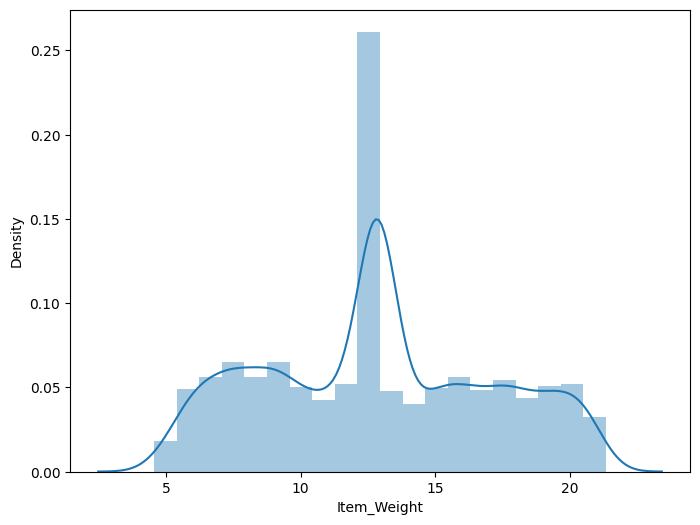

In [ ]:
plt.figure(figsize= (8,6))
sns.distplot(df['Item_Weight'],bins= 20)

<Axes: xlabel='Item_Visibility', ylabel='Density'>

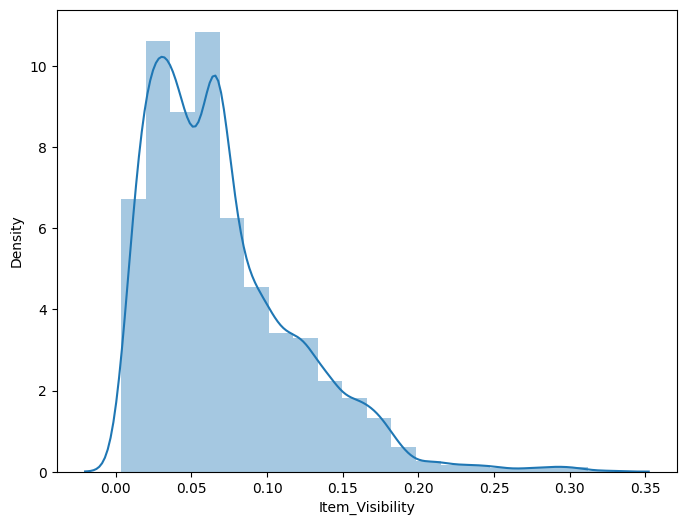

In [ ]:
plt.figure(figsize= (8,6))
sns.distplot(df['Item_Visibility'], bins=20)

In [ ]:
df['Item_Visibility']= np.log(df['Item_Visibility'])

<Axes: xlabel='Item_Visibility', ylabel='Density'>

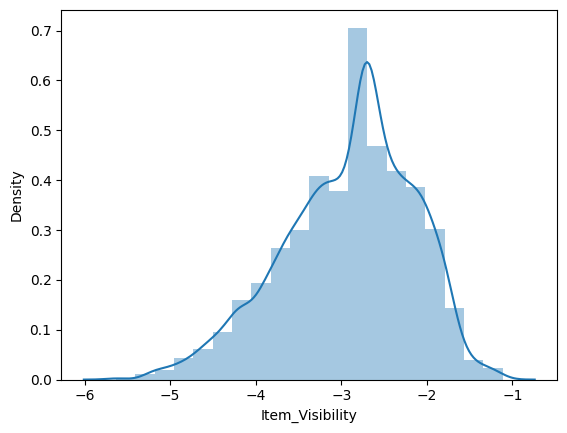

In [ ]:
sns.distplot(df['Item_Visibility'], bins= 20)


<Axes: xlabel='Item_MRP', ylabel='Density'>

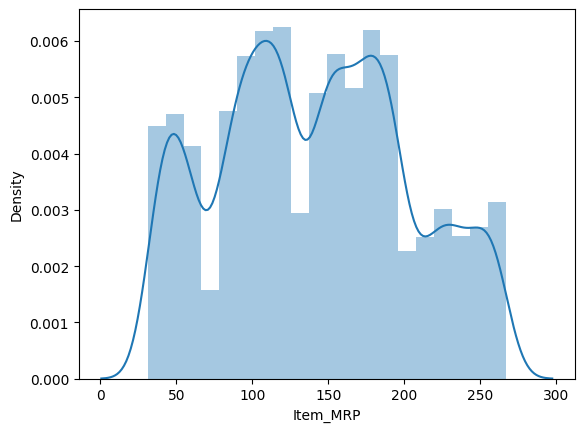

In [ ]:
sns.distplot(df['Item_MRP'], bins= 20)

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

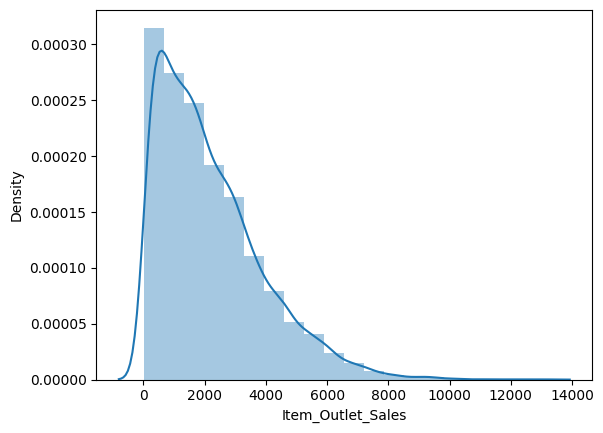

In [ ]:
sns.distplot(df['Item_Outlet_Sales'], bins= 20)

Here item outlet sale is Right skewed and we have to make it normally distributed, so applying log.

In [ ]:
df['Item_Outlet_Sales']= np.log(1+ df['Item_Outlet_Sales'])

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

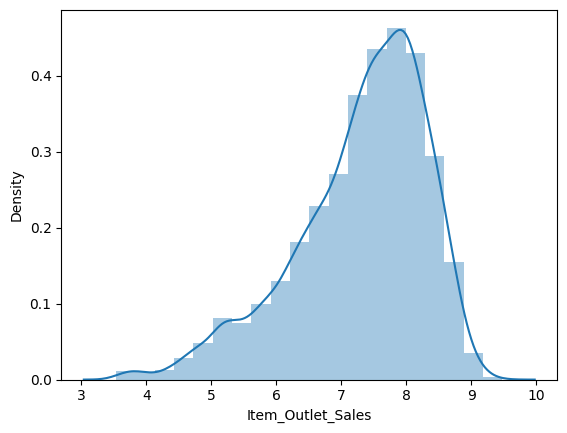

In [ ]:
sns.distplot(df['Item_Outlet_Sales'], bins= 20)

**Visualization of Categorical features**

In [ ]:
df['Item_Type']=df['Item_Type'].astype(str)

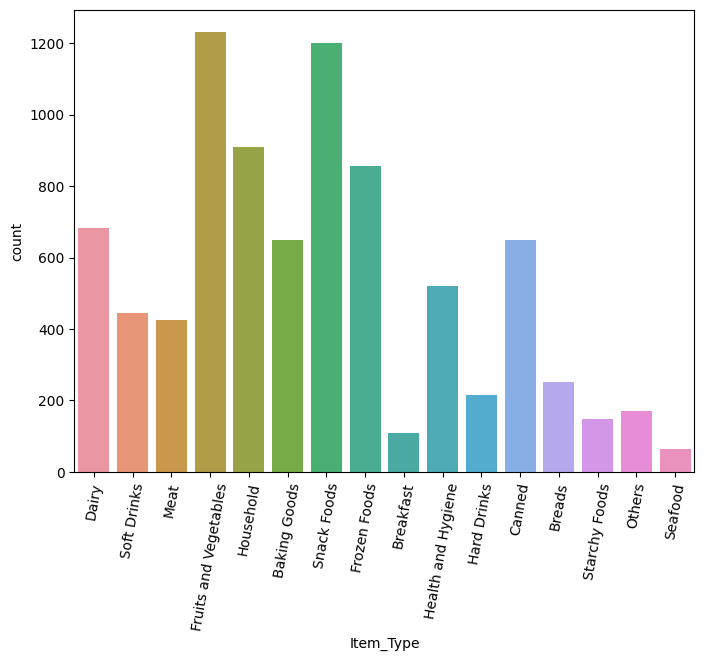

In [ ]:
plt.figure(figsize= (8,6))
Item_Type_Vis= sns.countplot(x= 'Item_Type', data= df)
Item_Type_Vis.set_xticklabels(Item_Type_Vis.get_xticklabels(), rotation= 80)
None

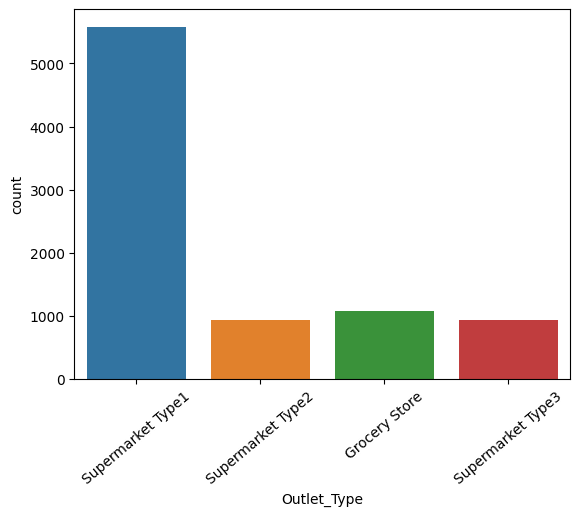

In [ ]:
Outlet_Type_Vis= sns.countplot(x= 'Outlet_Type', data= df)
Outlet_Type_Vis.set_xticklabels(Outlet_Type_Vis.get_xticklabels(), rotation= 40)
None

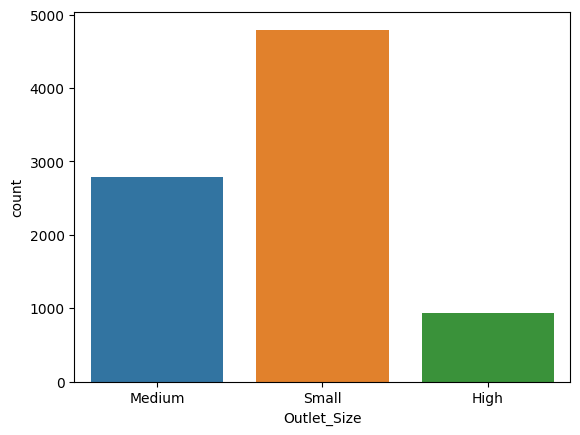

In [ ]:
Outlet_Size_Vis= sns.countplot(x= 'Outlet_Size', data= df)
Outlet_Size_Vis.set_xticklabels(Outlet_Size_Vis.get_xticklabels())
None

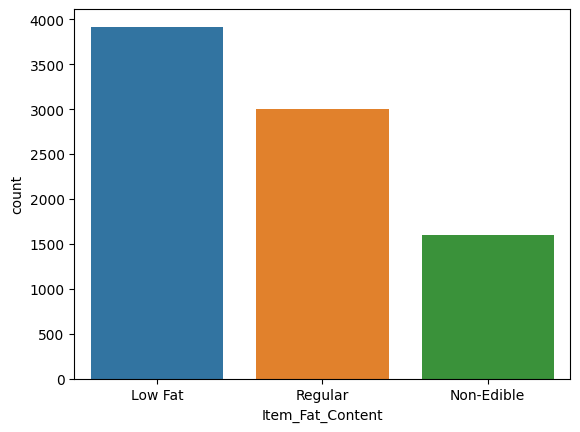

In [ ]:
Item_Fat_Content_Vis= sns.countplot(x= "Item_Fat_Content", data= df)
Item_Fat_Content_Vis.set_xticklabels(Item_Fat_Content_Vis.get_xticklabels())
None

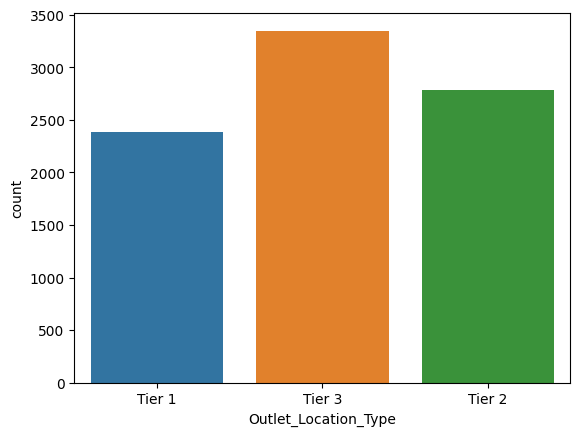

In [ ]:
Outlet_Location_type_Vis= sns.countplot(x='Outlet_Location_Type', data= df)
Outlet_Location_type_Vis.set_xticklabels(Outlet_Location_type_Vis.get_xticklabels())
None

# **Bivariate Analysis**

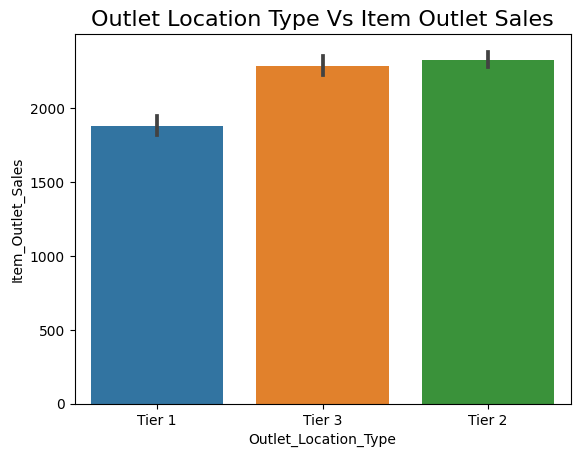

In [ ]:
#Now We will check Average sales Outlet location Type wise

Outlet_location_Sales= sns.barplot(x= 'Outlet_Location_Type', y= np.exp(df['Item_Outlet_Sales']), data= df)
Outlet_location_Sales.set_xticklabels(Outlet_location_Sales.get_xticklabels())
plt.title('Outlet Location Type Vs Item Outlet Sales', fontsize= 16)
None

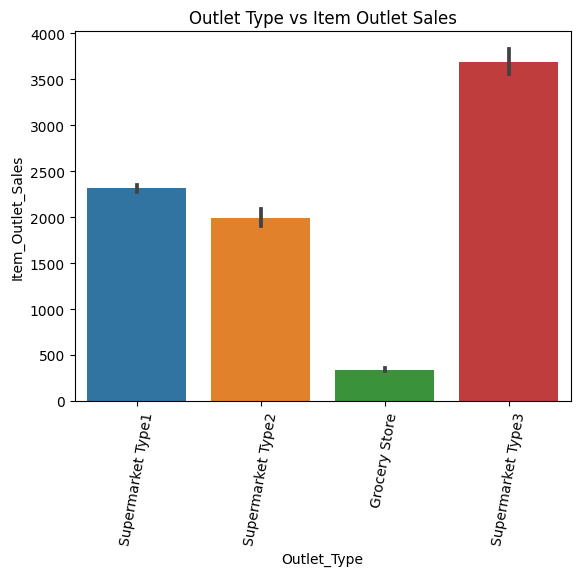

In [ ]:
# Checking for Average sales Outlet Type wise

Outlet_type_sales= sns.barplot(x= 'Outlet_Type', y= np.exp(df['Item_Outlet_Sales']), data= df)
Outlet_type_sales.set_xticklabels(Outlet_type_sales.get_xticklabels(), rotation= 80)
plt.title('Outlet Type vs Item Outlet Sales')
None

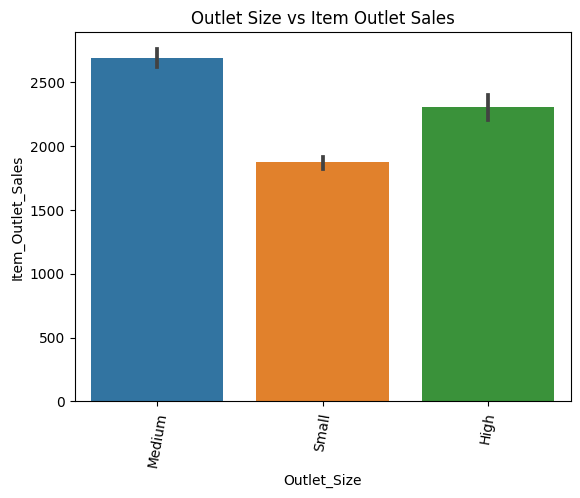

In [ ]:
# Checking for Avg sales Outlet size wise.

Outlet_Size_sales= sns.barplot(x= 'Outlet_Size', y= np.exp(df['Item_Outlet_Sales']), data= df)
Outlet_Size_sales.set_xticklabels(Outlet_Size_sales.get_xticklabels(), rotation= 80)
plt.title('Outlet Size vs Item Outlet Sales')
None

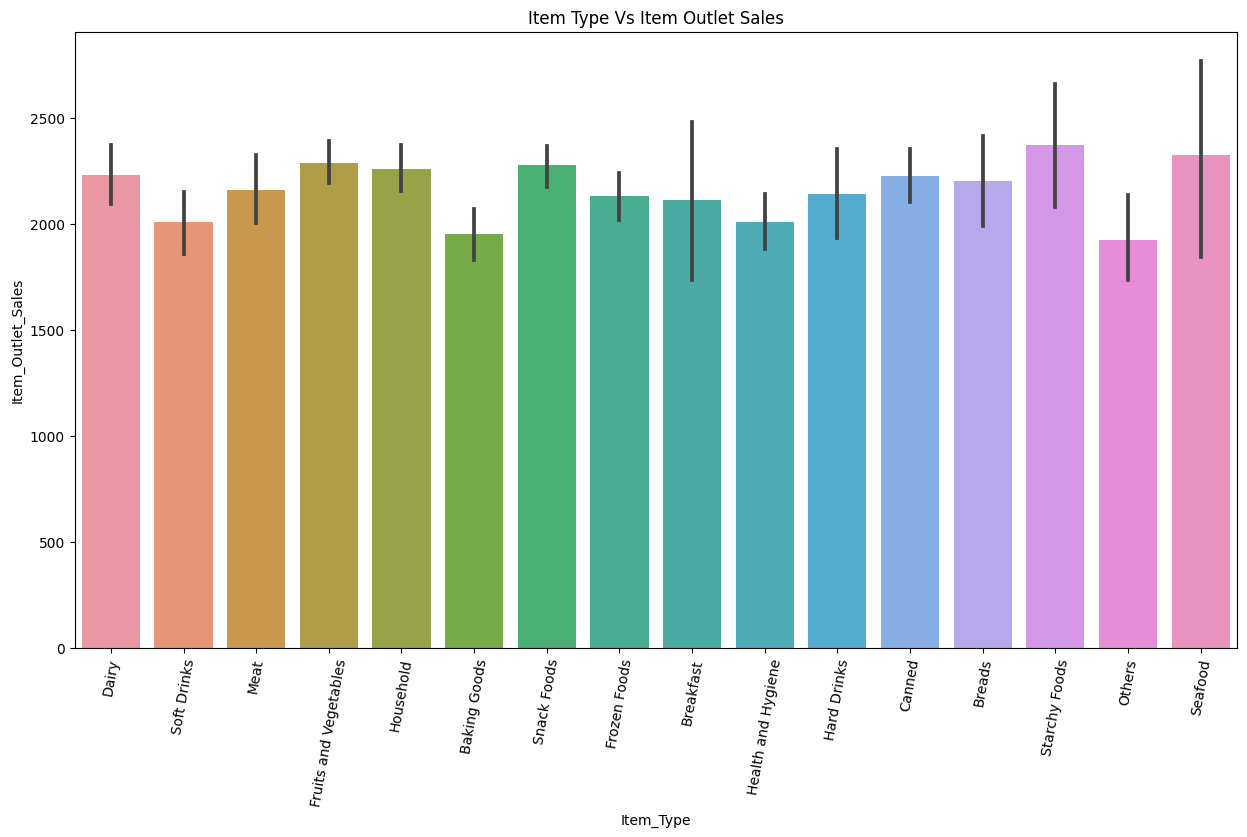

In [ ]:
plt.figure(figsize= (15,8))
Item_type_sales= sns.barplot(x='Item_Type', y= np.exp(df['Item_Outlet_Sales']), data= df)
Item_type_sales.set_xticklabels(Item_type_sales.get_xticklabels(), rotation= 80)
plt.title('Item Type Vs Item Outlet Sales')
None

In [ ]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,MRP_per_unit_weight,Outlet_years
Item_Weight,1.000000,-0.016981,0.024756,-0.008301,0.008059,-0.585147,0.008301
Item_Visibility,-0.016981,1.000000,-0.001024,-0.051922,-0.151906,0.002242,0.051922
Item_MRP,0.024756,-0.001024,1.000000,0.005020,0.509886,0.707961,-0.005020
Outlet_Establishment_Year,-0.008301,-0.051922,0.005020,1.000000,0.077032,0.071195,-1.000000
Item_Outlet_Sales,0.008059,-0.151906,0.509886,0.077032,1.000000,0.366027,-0.077032
MRP_per_unit_weight,-0.585147,0.002242,0.707961,0.071195,0.366027,1.000000,-0.071195
Outlet_years,0.008301,0.051922,-0.005020,-1.000000,-0.077032,-0.071195,1.000000


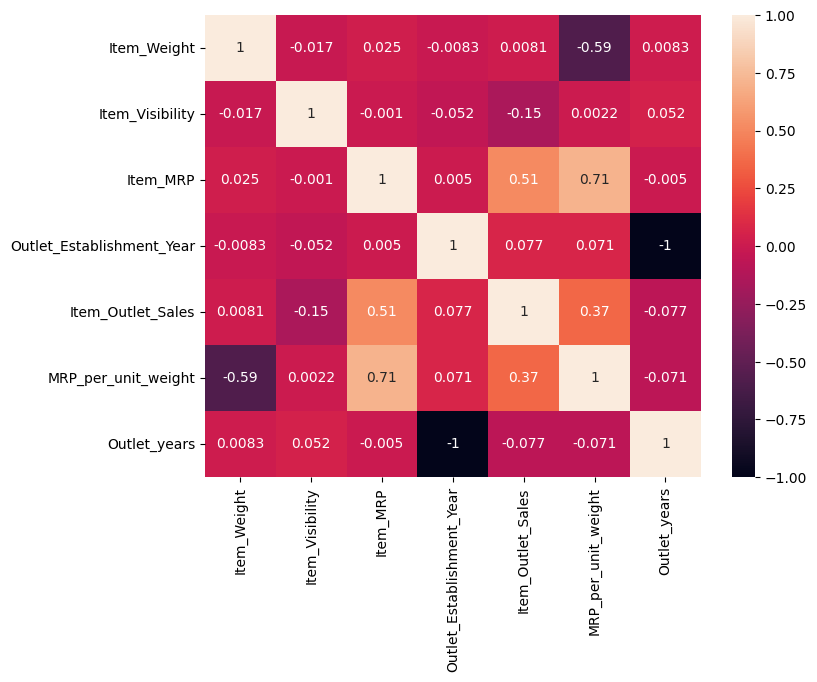

In [ ]:
plt.figure(figsize= (8,6))
sns.heatmap(df.corr(), annot= True)
None

There is no significant Correlation observed except Item MRP vs Item Outlet Sales because if Item MRP increase sales is also increased.

## **Now we will check outlet total sales through Pivot table with diffrent features.**

In [ ]:
import pandas as pd
pd.options.display.float_format= '{:.2f}'.format
df.pivot_table(values= 'Item_Outlet_Sales', index=['Outlet_Location_Type', 'Outlet_Type', 'Outlet_Size'], aggfunc= np.sum)

Item_Outlet_Sales
Outlet_Location_Type Outlet_Type       Outlet_Size                   
Tier 1               Grocery Store     Small                  2936.90
                     Supermarket Type1 Medium                 7003.43
                                       Small                  6975.20
Tier 2               Supermarket Type1 Small                 20933.00
Tier 3               Grocery Store     Small                  3075.08
                     Supermarket Type1 High                   6967.61
                     Supermarket Type2 Medium                 6804.20
                     Supermarket Type3 Medium                 7504.28

In [ ]:
df.pivot_table(values=  'Item_Outlet_Sales', index=[ 'Item_Fat_Content', 'New_Item_Type', 'Item_Type' ], aggfunc= np.sum)

Item_Outlet_Sales
Item_Fat_Content New_Item_Type  Item_Type                               
Low Fat          Drinking       Dairy                             983.18
                                Hard Drinks                      1558.10
                                Soft Drinks                      2709.61
                 Food           Baking Goods                     2334.00
                                Breads                           1028.20
                                Breakfast                         299.90
                                Canned                           2510.44
                                Dairy                            2035.63
                                Frozen Foods                     3247.79
                                Fruits and Vegetables            4593.35
                                Meat                             1223.32
                                Seafood                           261.68
                                Snack Foods                      5159.89
                                Starchy Foods                     613.23
Non-Edible       Non-Consumable Health and Hygiene               3760.41
                                Household                        6682.00
                                Others                           1210.68
Regular          Drinking       Soft Drinks                       501.32
                 Food           Baking Goods                     2320.24
                                Breads                            813.76
                                Breakfast                         487.50
                                Canned                           2263.39
                                Dairy                            1948.86
                                Frozen Foods                     2957.69
                                Fruits and Vegetables            4457.52
                                Meat                             1873.06
                                Seafood                           203.46
                                Snack Foods                      3681.06
                                Starchy Foods                     480.42

In [ ]:
df.pivot_table(values= "Item_Outlet_Sales", index= ['Outlet_Size', 'Outlet_Identifier'], aggfunc= np.sum)

Item_Outlet_Sales
Outlet_Size Outlet_Identifier                   
High        OUT013                       6967.61
Medium      OUT018                       6804.20
            OUT027                       7504.28
            OUT049                       7003.43
Small       OUT010                       3075.08
            OUT017                       6961.77
            OUT019                       2936.90
            OUT035                       7042.61
            OUT045                       6928.61
            OUT046                       6975.20

# **Data Preprocessing**

**Label Encoding**

In [ ]:
#Doing label incoding for variables which has internal dependency.

from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [ ]:
df['Outlet']= le.fit_transform(df['Outlet_Identifier'])

### **One Hot Encoding**

In [ ]:
#One Hot Encoding for variables which has no internal dependency.

df= pd.get_dummies(df, columns=['Outlet_Type','Item_Fat_Content','New_Item_Type','Outlet_Size','Outlet_Location_Type'])

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Shelf_Life,MRP_per_unit_weight,...,Item_Fat_Content_Regular,New_Item_Type_Drinking,New_Item_Type_Food,New_Item_Type_Non-Consumable,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3
0,FDA15,9.30,-4.13,Dairy,249.81,OUT049,1999,8.23,Perishable,26.86,...,0,0,1,0,0,1,0,1,0,0
1,DRC01,5.92,-3.95,Soft Drinks,48.27,OUT018,2009,6.10,Non-Perishable,8.15,...,1,1,0,0,0,1,0,0,0,1
2,FDN15,17.50,-4.09,Meat,141.62,OUT049,1999,7.65,Perishable,8.09,...,0,0,1,0,0,1,0,1,0,0
3,FDX07,19.20,-2.72,Fruits and Vegetables,182.09,OUT010,1998,6.60,Perishable,9.48,...,1,0,1,0,0,0,1,0,0,1
4,NCD19,8.93,-2.72,Household,53.86,OUT013,1987,6.90,Non-Perishable,6.03,...,0,0,0,1,1,0,0,0,0,1


In [ ]:
df.shape

(8523, 28)

In [ ]:
df.dtypes

Item_Identifier                   object
Item_Weight                      float64
Item_Visibility                  float64
Item_Type                         object
Item_MRP                         float64
Outlet_Identifier                 object
Outlet_Establishment_Year          int64
Item_Outlet_Sales                float64
Shelf_Life                        object
MRP_per_unit_weight              float64
Outlet_years                       int64
Outlet                             int64
Outlet_Type_Grocery Store          uint8
Outlet_Type_Supermarket Type1      uint8
Outlet_Type_Supermarket Type2      uint8
Outlet_Type_Supermarket Type3      uint8
Item_Fat_Content_Low Fat           uint8
Item_Fat_Content_Non-Edible        uint8
Item_Fat_Content_Regular           uint8
New_Item_Type_Drinking             uint8
New_Item_Type_Food                 uint8
New_Item_Type_Non-Consumable       uint8
Outlet_Size_High                   uint8
Outlet_Size_Medium                 uint8
Outlet_Size_Smal

### **Spliting the Data into Train and Test**

In [ ]:
train= df.drop(['Item_Outlet_Sales', 'Item_Identifier', 'Item_Type', 'Outlet_Identifier', 'Shelf_Life'], axis= 1)
test= df['Item_Outlet_Sales']

In [ ]:
print(train.shape)
print(test.shape)

(8523, 23)
(8523,)


## *Statical Analysis*

In [ ]:
import statsmodels.api as sm

In [69]:
x= train
y=test
x= sm.add_constant(x)
result= sm.OLS(y,x).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     1371.
Date:                Wed, 22 Nov 2023   Prob (F-statistic):               0.00
Time:                        18:35:34   Log-Likelihood:                -6788.3
No. Observations:                8523   AIC:                         1.361e+04
Df Residuals:                    8506   BIC:                         1.373e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

# **Observations**


1.   P value for F static is < 0.05 so we can say that our model is significant(at least for one independent variable the the regression coef. is not equal to zero, rejecting the Null Hypothesis. In this the Null Hypothesis is 'All the regression coef. are equal to zero.
2.   R-Squared value indicate that 72.1 percentage of variance is explained by our model. Adjusted R-square is less than R-square which indicate that model has some insignificant attributes.
3.  Checked for P Values, If P-value is < 0.05 we will say that attribut is contributing to model that means rejecting the Null Hypothesis and if P- value is >0.05 it means the atribute is insignificant that means accepting the Null Hypothesis.
4.  Looking at P-values we can say that attributes ['Item_Weight','Item_Visibility','MRP_per_unit_weight','Item_Fat_Content_Low Fat', 'Item_Fat_Content_Non-Edible','New_Item_Type_Drinking','New_Item_Type_Food','Item_Fat_Content_Regular', 'New_Item_Type_Non-Consumable','Outlet_Location_Type_Tier 2'] has no cobtribution in dependent variables.
5.  We can say that these attributes are not affecting sales.
6.  Prob(Omnibus)- One of the assumption of OLS method is that errors are normally distributed and Omnibus test is performed to check normal distribution. Here the null hypothesis is that the errors are normally dirtibuted. Prob(Omnibus) is supposed to be closed to 1 in order to satisfy OLS method but in this case Prob(Omnibus) is close to 0.00 which means OLS method is not satisfied, errors are not normally distributed.
7.  Durbin-Watson- The value of this is 2.008 which is close to 2 this means this data has no sutocorelation.
8.  Prob(Jarque-Bera)- It is in line with Omnibus test. It is also performed for destribution analysis of regression errors. It is supposed to agree with the Omnibus test and large value of JB Test indicate that errors are not normally distributed.

In [70]:
train_1= train.drop(['Item_Weight','Item_Visibility','MRP_per_unit_weight','Item_Fat_Content_Low Fat',
                     'Item_Fat_Content_Non-Edible','New_Item_Type_Drinking',
                     'New_Item_Type_Food','Item_Fat_Content_Regular', 'New_Item_Type_Non-Consumable','Outlet_Location_Type_Tier 2'], axis=1)

In [71]:
x= train_1
y= test

x= sm.add_constant(x)
result= sm.OLS(y,x).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     2194.
Date:                Wed, 22 Nov 2023   Prob (F-statistic):               0.00
Time:                        18:38:58   Log-Likelihood:                -6790.4
No. Observations:                8523   AIC:                         1.360e+04
Df Residuals:                    8512   BIC:                         1.368e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

## **Observation**


1.   F- Static is increased by a significant amount, so model is significant.
2.   R-Squares is decreased it means that dropped attributes are insignificant for model.
3.  The p values of all the attributes are <0.05 that means all the selected attributes are significant to dependent variable.



## **Splitting Data into Train and Test**

In [72]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [73]:
x_train, x_test, y_train, y_test= train_test_split(train_1, test, test_size= .25, shuffle= True, random_state= 100)

## **Modeling**

In [74]:
def model_details(model, algo):
  y_pred= model.predict(x_test)
  rmse= np.sqrt(mean_squared_error(y_test, y_pred))
  mae= mean_absolute_error(y_test, y_pred)
  accu= round(model.score(x_test, y_test)*100,2)
  cvs= cross_val_score(model, x_test, y_test, cv= 5)
  mean= round(cvs.mean()*100,2)
  std= round(cvs.std()*2,2)
  print("Model Report")
  print('Acuuracy of {}: {}%'.format(alg, accu),)
  print('RMSE value: ', round(rmse,2))
  print('Cross Validation Score : Mean - {}| Std - {}'.format(mean, std))
  print('MAE value: ', round(mae, 2))
